In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
data=pd.read_csv("/content/drive/MyDrive/Non Invasive Glucometer/Blood glucose.csv")
data=data.iloc[:,[0,1,2,5,6,7,12,13]]

In [3]:
data['Sex']=data['Sex'].astype('category').cat.codes
data['Food Habit']=data['Food Habit'].astype('category').cat.codes
#enc=OneHotEncoder()
#data['Sex']=enc.fit_transform(data[['Sex']]).toarray()

In [4]:
data.head(5)

,Age,Sex,Food Habit,BMI,Invasive Value(mg/dL)-Fasting,Invasive Value(mg/dL)-PP,Harmonic Mean (F),Harmonic Mean(PP)
0,21,1,0,24.25,96,100,3.334811,3.312419
1,55,1,1,24.44,94,107,3.351461,3.295669
2,49,0,1,30.85,147,168,3.253156,3.240683
3,20,1,0,24.80,93,102,3.333201,3.308233
4,61,1,0,24.90,139,162,3.264123,3.249923


# Analysis:

In [37]:
from sklearn.model_selection import train_test_split

x_pp=data.iloc[:,[0,1,2,3,7]]
y_pp=data.iloc[:,5]
xtrain,xtest,ytrain,ytest=train_test_split(x_pp,y_pp,test_size=0.2,random_state=42)

x_fasting=data.iloc[:,[0,1,2,3,6]]
y_fasting=data.iloc[:,4]
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x_fasting,y_fasting,test_size=0.2,random_state=42)


ytest=ytest.tolist()
ytest1=ytest1.tolist()

pp=[]

def predict_glucose_pp(regressor,linear_kernel=1,name=""):
  regressor.fit(xtrain,ytrain)
  ypred=regressor.predict(xtest)
  testacc=0
  for i in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred[i]-ytest[i])
    diff/=ytest[i]
    testacc+=diff

  testacc/=len(ytest)
  testacc=1-testacc
  testacc*=100
  print('testacc for PP =',testacc,"%")
  if linear_kernel>2 :
    pp.append(testacc)
    return ypred
  x=xtrain.columns.tolist()
  if linear_kernel!=2:
    if linear_kernel==0:
      a=[round(r,3) for r in regressor.coef_[0]]
      b=round(regressor.intercept_[0],3)
    else:
      a=[round(r,3) for r in regressor.coef_]
      b=round(regressor.intercept_,3)
    print("Equation:")
    print("Glucose PP = ",b,"+",a[0],'*',x[0],'+',a[1],'*',x[1],"+",a[2],'*',x[2],'+',a[3],'*',x[3],"+",a[4],'*',x[4])
  else:
    importances = regressor.feature_importances_
    print({x[i]: importances[i] for i in range(len(x))})
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 3))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), np.array(x)[indices], rotation='horizontal')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.savefig("/content/drive/MyDrive/Non Invasive Glucometer/PP Feat_Imp_"+name+".jpg")
    plt.show()
  pp.append(testacc)
  return ypred

fasting=[]
def predict_glucose_fasting(regressor,linear_kernel=1,name=""):
  regressor.fit(xtrain1,ytrain1)
  ypred1=regressor.predict(xtest1)
  testacc1=0
  for i in range (0,len(ytest1)):
   #print(ytest1[i],"--->",ypred1[i])
   diff1=abs(ypred1[i]-ytest1[i])
   diff1/=ytest1[i]
   testacc1+=diff1
  testacc1/=len(ytest1)
  testacc1=1-testacc1
  testacc1*=100
  print('testacc for fasting=',testacc1,"%")
  if linear_kernel>2 :
    fasting.append(testacc1)
    return ypred1
  x=xtrain1.columns.tolist()
  if linear_kernel!=2:
    if linear_kernel==0:
      a=[round(r,3) for r in regressor.coef_[0]]
      b=round(regressor.intercept_[0],3)
    else:
      a=[round(r,3) for r in regressor.coef_]
      b=round(regressor.intercept_,3)
    print("Equation:")
    print("Glucose fasting = ",b,"+",a[0],'*',x[0],'+',a[1],'*',x[1],"+",a[2],'*',x[2],'+',a[3],'*',x[3],"+",a[4],'*',x[4])
  else:
    importances = regressor.feature_importances_
    indices = np.argsort(importances)[::-1]
    print({x[i]: importances[i] for i in range(len(x))})
    plt.figure(figsize=(8, 3))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), np.array(x)[indices], rotation='horizontal')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.savefig("/content/drive/MyDrive/Non Invasive Glucometer/Fasting Feat_Imp_"+name+".jpg")
    plt.show()
  fasting.append(testacc1)
  return ypred1

In [6]:
model=[]
r2_mean=[]
mse_mean=[]
evs_mean=[]
msle_mean=[]

In [7]:
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_squared_log_error as msle,explained_variance_score as evs

## linear models

In [8]:
from sklearn import linear_model
r1 = linear_model.LinearRegression()
r2 = linear_model.LinearRegression()
model.append("Linear")
print(model[-1])
ypred=predict_glucose_pp(r1)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
c1=evs(ytest,ypred)
ypred1=predict_glucose_fasting(r2)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
c2=evs(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
evs_mean.append((c1+c2)/2)

d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

Linear
testacc for PP = 85.02391634643965 %
Equation:
Glucose PP =  2831.470163566436 + 0.050437624921665584 * Age + -1.9606695684738256 * Sex + -8.32085288054106 * Food Habit + 1.7226596911688747 * BMI + -837.2452108132742 * Harmonic Mean(PP)
testacc for fasting= 88.96765775774195 %
Equation:
Glucose fasting =  1387.9323570560578 + 0.015135834802901166 * Age + 2.035739198641992 * Sex + 3.352303321713859 * Food Habit + 1.7038421996484994 * BMI + -401.5568885268593 * Harmonic Mean (F)


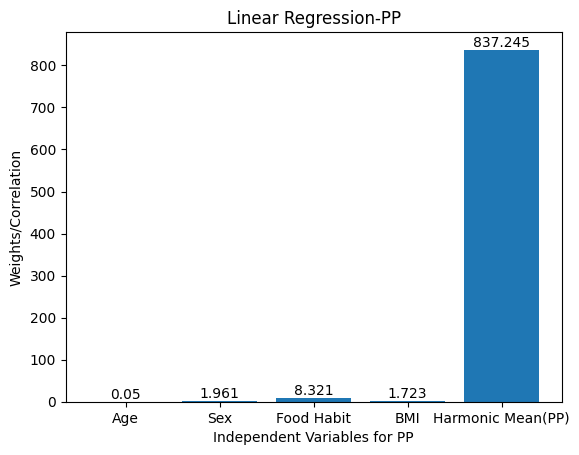

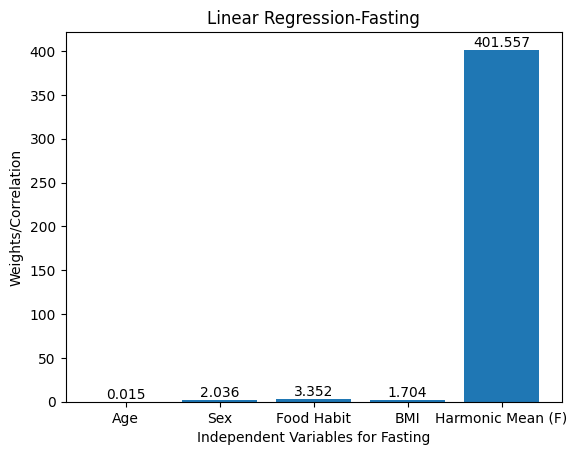

In [11]:
plt.bar(xtrain.columns.tolist(),[abs(r) for r in r1.coef_])
for i in range(len(xtrain.columns.tolist())):
    plt.text(x=i, y=[round(abs(r),3) for r in r1.coef_][i], s=[round(abs(r),3) for r in r1.coef_][i], ha='center', va='bottom')
plt.xlabel('Independent Variables for PP')
plt.ylabel('Weights/Correlation')
plt.title('Linear Regression-PP')
plt.savefig('Linear Regression-PP.jpg')
plt.show()
plt.bar(xtrain1.columns.tolist(),[abs(r) for r in r2.coef_])
for i in range(len(xtrain1.columns.tolist())):
    plt.text(x=i, y=[round(abs(r),3) for r in r2.coef_][i], s=[round(abs(r),3) for r in r2.coef_][i], ha='center', va='bottom')
plt.xlabel('Independent Variables for Fasting')
plt.ylabel('Weights/Correlation')
plt.title('Linear Regression-Fasting')
plt.savefig('Linear Regression-Fasting.jpg')
plt.show()

In [12]:
r1=linear_model.Ridge(alpha=0.1)
r2=linear_model.Ridge(alpha=0.1)
model.append("Ridge")
print(model[-1])
ypred=predict_glucose_pp(r1)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
c1=evs(ytest,ypred)
ypred1=predict_glucose_fasting(r2)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
c2=evs(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

Ridge
testacc for PP = 84.37328566689841 %
Equation:
Glucose PP =  643.1712886644896 + 0.11615518690144162 * Age + -2.9135886722682267 * Sex + 0.9459977155081962 * Food Habit + 3.623557346640559 * BMI + -185.23356898299176 * Harmonic Mean(PP)
testacc for fasting= 85.45324363607617 %
Equation:
Glucose fasting =  420.76448301889945 + 0.007331466408607048 * Age + 0.39135458305607124 * Sex + 5.315160386181831 * Food Habit + 2.9335054677142924 * BMI + -117.23620082854575 * Harmonic Mean (F)


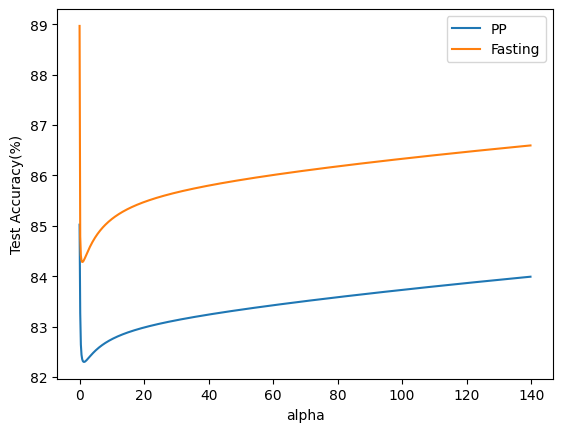

In [ ]:
ridge_pp=[]
ridge_fast=[]
for i in range (0,1400,2):
  r=linear_model.Ridge(alpha=i/10)
  r.fit(xtrain,ytrain)
  ypred=r.predict(xtest)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred[j]-ytest[j])
    diff/=ytest[j]
    testacc+=diff
  testacc/=len(ytest)
  testacc=1-testacc
  testacc*=100
  ridge_pp.append(testacc)
  r=linear_model.Ridge(alpha=i/10)
  r.fit(xtrain1,ytrain1)
  ypred1=r.predict(xtest1)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred1[j]-ytest1[j])
    diff/=ytest1[j]
    testacc+=diff
  testacc/=len(ytest1)
  testacc=1-testacc
  testacc*=100
  ridge_fast.append(testacc)
plt.plot([i/10 for i in range(0,1400,2)],ridge_pp,label="PP")
plt.plot([i/10 for i in range(0,1400,2)],ridge_fast,label="Fasting")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Test Accuracy(%)')
plt.savefig('Ridge- aplha vs acc')

In [19]:
r1=linear_model.Lasso(alpha=0.4)
r2=linear_model.Lasso(alpha=0.4)
model.append("Lasso")
print(model[-1])
ypred=predict_glucose_pp(r1)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
c1=evs(ytest,ypred)
ypred1=predict_glucose_fasting(r2)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
c2=evs(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
evs_mean.append((c1+c2)/2)

d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

print(r2_mean[-1],mse_mean[-1],evs_mean[-1],msle_mean[-1])

Lasso
testacc for PP = 85.18025382640724 %
Equation:
Glucose PP =  1304.155 + 0.07 * Age + -1.226 * Sex + -0.0 * Food Habit + 3.064 * BMI + -382.387 * Harmonic Mean(PP)
testacc for fasting= 85.79283766039593 %
Equation:
Glucose fasting =  343.018 + 0.032 * Age + 0.0 * Sex + 3.352 * Food Habit + 2.963 * BMI + -93.896 * Harmonic Mean (F)
0.04975169980220845 388.0032298008757 0.16075879960654482 0.023351498644416394


In [20]:
r1=linear_model.ElasticNet(alpha=0.0001)
r2=linear_model.ElasticNet(alpha=0.0001)
model.append("Elastic")
print(model[-1])
ypred=predict_glucose_pp(r1)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
c1=evs(ytest,ypred)
ypred1=predict_glucose_fasting(r2)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
c2=evs(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
evs_mean.append((c1+c2)/2)

d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

Elastic
testacc for PP = 85.05076122141735 %
Equation:
Glucose PP =  2681.428 + 0.055 * Age + -2.029 * Sex + -7.681 * Food Habit + 1.853 * BMI + -792.541 * Harmonic Mean(PP)
testacc for fasting= 88.90953110199418 %
Equation:
Glucose fasting =  1336.761 + 0.015 * Age + 1.948 * Sex + 3.46 * Food Habit + 1.769 * BMI + -386.515 * Harmonic Mean (F)


In [ ]:
plt.bar(xtrain.columns.tolist(),[abs(r) for r in r1.coef_])
for i in range(len(xtrain.columns.tolist())):
    plt.text(x=i, y=[round(abs(r),3) for r in r1.coef_][i], s=[round(abs(r),3) for r in r1.coef_][i], ha='center', va='bottom')
plt.xlabel('Independent Variables for PP')
plt.ylabel('Weights/Correlation')
plt.title('Elastic Net Regression-PP')
plt.savefig('Elastic Net Regression-PP.jpg')
plt.show()
plt.bar(xtrain1.columns.tolist(),[abs(r) for r in r2.coef_])
for i in range(len(xtrain1.columns.tolist())):
    plt.text(x=i, y=[round(abs(r),3) for r in r2.coef_][i], s=[round(abs(r),3) for r in r2.coef_][i], ha='center', va='bottom')
plt.xlabel('Independent Variables for Fasting')
plt.ylabel('Weights/Correlation')
plt.title('Elastic Net Regression-Fasting')
plt.savefig('Elastic Net Regression-Fasting.jpg')
plt.show()

In [ ]:
n=40
ridge_pp=[]
ridge_fast=[]
for i in range (0,n,2):
  r=linear_model.ElasticNet(alpha=i/10)
  r.fit(xtrain,ytrain)
  ypred=r.predict(xtest)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred[j]-ytest[j])
    diff/=ytest[j]
    testacc+=diff
  testacc/=len(ytest)
  testacc=1-testacc
  testacc*=100
  ridge_pp.append(testacc)
  r=linear_model.ElasticNet(alpha=i/10)
  r.fit(xtrain1,ytrain1)
  ypred1=r.predict(xtest1)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred1[j]-ytest1[j])
    diff/=ytest1[j]
    testacc+=diff
  testacc/=len(ytest1)
  testacc=1-testacc
  testacc*=100
  ridge_fast.append(testacc)
plt.plot([i/10 for i in range(0,n,2)],ridge_pp,label="PP")
plt.plot([i/10 for i in range(0,n,2)],ridge_fast,label="Fasting")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Test Accuracy(%)')
plt.savefig('Elastic Net- aplha vs acc')

In [23]:
from sklearn.svm import SVR
r1=SVR(kernel='linear',C=0.02,epsilon=0.01)
r2=SVR(kernel='linear',C=0.02,epsilon=0.01)
model.append("SVR linear")
print(model[-1])
ypred=predict_glucose_pp(r1,0)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,0)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)

d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

print(r2_mean[-1],mse_mean[-1],evs_mean[-1],msle_mean[-1])

SVR linear
testacc for PP = 89.31061863156798 %
Equation:
Glucose PP =  79.57 + 0.374 * Age + -0.06 * Sex + 0.04 * Food Habit + 0.813 * BMI + -0.015 * Harmonic Mean(PP)
testacc for fasting= 90.73645239434637 %
Equation:
Glucose fasting =  67.032 + 0.325 * Age + 0.017 * Sex + 0.04 * Food Habit + 0.914 * BMI + -0.016 * Harmonic Mean (F)
0.3797930516800888 264.0976663553806 0.41250496602472786 0.01668679164403066


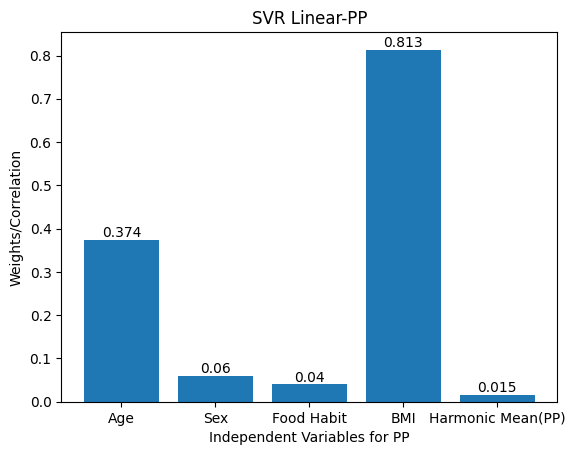

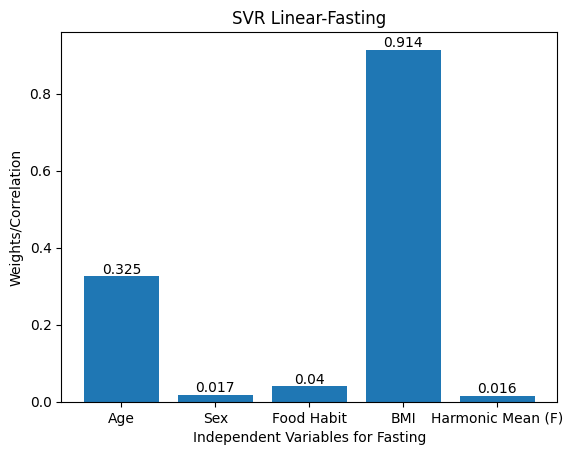

In [24]:
plt.bar(xtrain.columns.tolist(),[abs(r) for r in r1.coef_[0]])
for i in range(len(xtrain.columns.tolist())):
    plt.text(x=i, y=[round(abs(r),3) for r in r1.coef_[0]][i], s=[round(abs(r),3) for r in r1.coef_[0]][i], ha='center', va='bottom')
plt.xlabel('Independent Variables for PP')
plt.ylabel('Weights/Correlation')
plt.title('SVR Linear-PP')
plt.savefig('SVR Linear-PP.jpg')
plt.show()
plt.bar(xtrain1.columns.tolist(),[abs(r) for r in r2.coef_[0]])
for i in range(len(xtrain1.columns.tolist())):
    plt.text(x=i, y=[round(abs(r),3) for r in r2.coef_[0]][i], s=[round(abs(r),3) for r in r2.coef_[0]][i], ha='center', va='bottom')
plt.xlabel('Independent Variables for Fasting')
plt.ylabel('Weights/Correlation')
plt.title('SVR Linear-Fasting')
plt.savefig('SVR Linear-Fasting.jpg')
plt.show()

## non linear models

Decision Tree
testacc for PP = 93.25306067330781 %
{'Age': 0.0, 'Sex': 0.0, 'Food Habit': 0.0, 'BMI': 0.0, 'Harmonic Mean(PP)': 1.0}


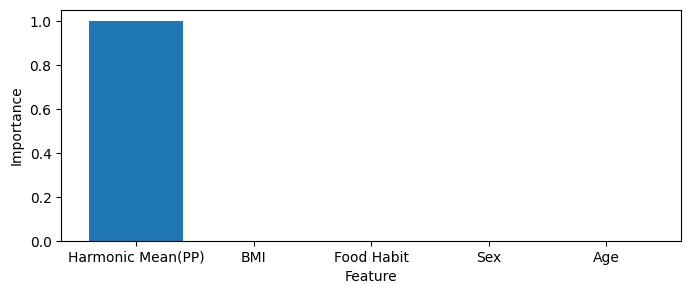

testacc for fasting= 92.68857252247761 %
{'Age': 0.0, 'Sex': 0.0, 'Food Habit': 0.0, 'BMI': 0.0, 'Harmonic Mean (F)': 1.0}


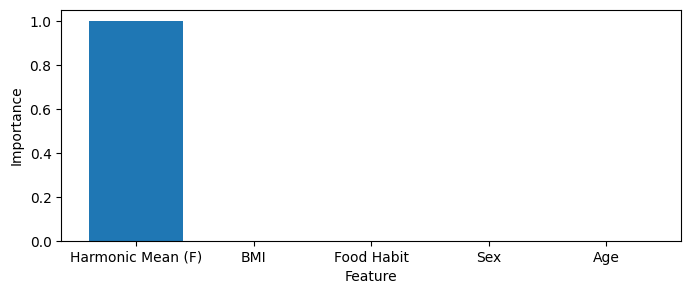

In [39]:
from sklearn.tree import DecisionTreeRegressor
r1=DecisionTreeRegressor(max_depth=2)
r2=DecisionTreeRegressor(max_depth=2)
model.append("Decision Tree")
print(model[-1])
ypred=predict_glucose_pp(r1,2,model[-1])
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,2,model[-1])
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

In [ ]:
n=15
ridge_pp=[]
ridge_fast=[]
for i in range (1,n):
  r=DecisionTreeRegressor(max_depth=i)
  r.fit(xtrain,ytrain)
  ypred=r.predict(xtest)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred[j]-ytest[j])
    diff/=ytest[j]
    testacc+=diff
  testacc/=len(ytest)
  testacc=1-testacc
  testacc*=100
  ridge_pp.append(testacc)
  r=DecisionTreeRegressor(max_depth=i)
  r.fit(xtrain1,ytrain1)
  ypred1=r.predict(xtest1)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred1[j]-ytest1[j])
    diff/=ytest1[j]
    testacc+=diff
  testacc/=len(ytest1)
  testacc=1-testacc
  testacc*=100
  ridge_fast.append(testacc)
plt.plot([i for i in range(1,n)],ridge_pp,label="PP")
plt.plot([i for i in range(1,n)],ridge_fast,label="Fasting")
plt.legend()
plt.xlabel('Max-Depth')
plt.ylabel('Test Accuracy(%)')
plt.savefig('dtr- max depth vs acc')

Random Forest
testacc for PP = 93.50095441192917 %
{'Age': 0.03534008103156836, 'Sex': 0.007375999165252413, 'Food Habit': 0.004404232263006556, 'BMI': 0.1382665716518751, 'Harmonic Mean(PP)': 0.8146131158882975}


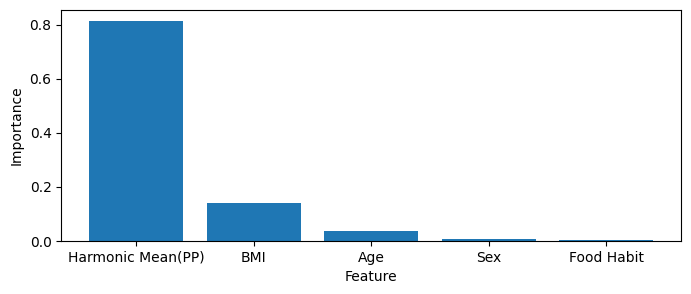

testacc for fasting= 93.22197194362893 %
{'Age': 0.05230891618367531, 'Sex': 0.006279321949235426, 'Food Habit': 0.006974340174167771, 'BMI': 0.15374459774977556, 'Harmonic Mean (F)': 0.7806928239431459}


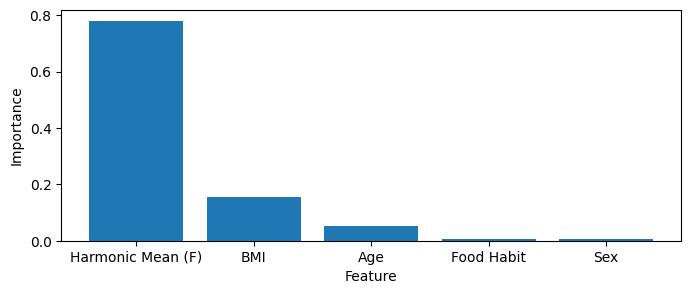

In [40]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
r1=RandomForestRegressor(n_estimators=21,max_depth=251)
r2=RandomForestRegressor(n_estimators=21,max_depth=251)
model.append("Random Forest")
print(model[-1])
ypred=predict_glucose_pp(r1,2,model[-1])
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,2,model[-1])
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)
print()

In [ ]:
n=15
ridge_pp=[]
ridge_fast=[]
for i in range (-10,1):
  r=GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate=pow(10,0.25*i))
  r.fit(xtrain,ytrain)
  ypred=r.predict(xtest)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred[j]-ytest[j])
    diff/=ytest[j]
    testacc+=diff
  testacc/=len(ytest)
  testacc=1-testacc
  testacc*=100
  ridge_pp.append(testacc)
  r=GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate=pow(10,0.25*i))
  r.fit(xtrain1,ytrain1)
  ypred1=r.predict(xtest1)
  testacc=0
  for j in range (0,len(ytest)):
    #print(ytest[i],"--->",ypred[i])
    diff=abs(ypred1[j]-ytest1[j])
    diff/=ytest1[j]
    testacc+=diff
  testacc/=len(ytest1)
  testacc=1-testacc
  testacc*=100
  ridge_fast.append(testacc)
plt.plot([pow(10,0.25*i) for i in range (-10,1)],ridge_pp,label="PP")
plt.plot([pow(10,0.25*i) for i in range (-10,1)],ridge_fast,label="Fasting")
plt.legend()
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy(%)')
plt.savefig('grad- lr vs acc')

Gradient Boosting
testacc for PP = 93.14989404408398 %
{'Age': 0.02400693190097855, 'Sex': 0.00017452862592713526, 'Food Habit': 0.0, 'BMI': 0.04745106579507418, 'Harmonic Mean(PP)': 0.9283674736780201}


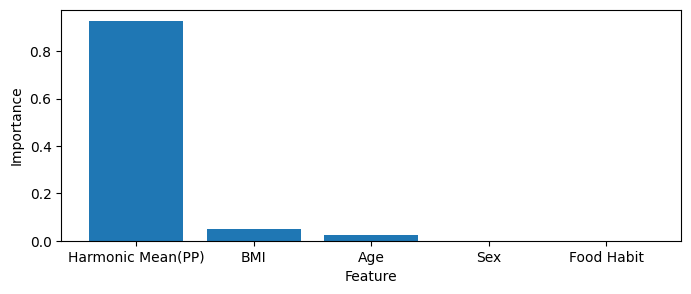

testacc for fasting= 92.583964288295 %
{'Age': 0.03927852206894538, 'Sex': 2.8711856077696555e-05, 'Food Habit': 0.01657314253838595, 'BMI': 0.09766446321496516, 'Harmonic Mean (F)': 0.8464551603216259}


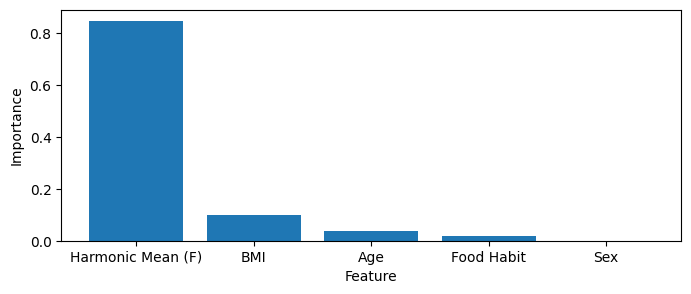

In [46]:
r1=GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate=0.1)
r2=GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate=0.1)
model.append("Gradient Boosting")
print(model[-1])
ypred=predict_glucose_pp(r1,2,model[-1])
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,2,model[-1])
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)
print()

Ada Boost
testacc for PP = 93.13393504480261 %
{'Age': 0.01273589862960715, 'Sex': 0.01028155026858474, 'Food Habit': 0.012460450733224455, 'BMI': 0.17227898656182408, 'Harmonic Mean(PP)': 0.7922431138067598}


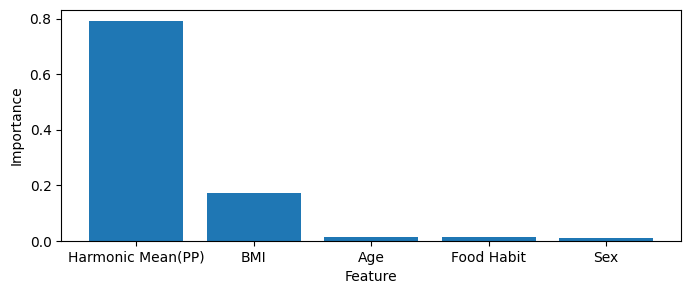

testacc for fasting= 92.72339913532512 %
{'Age': 0.0391776955815667, 'Sex': 0.008037174100201348, 'Food Habit': 0.0008037840590047515, 'BMI': 0.2121001153310183, 'Harmonic Mean (F)': 0.7398812309282089}


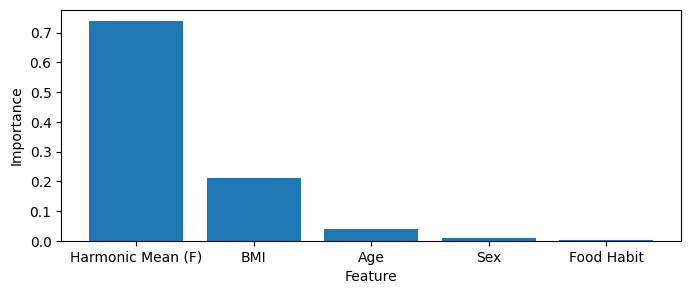

92.45249306902512


In [47]:
r1=AdaBoostRegressor(n_estimators=10,learning_rate=pow(10,-0.5))
r2=AdaBoostRegressor(n_estimators=10,learning_rate=pow(10,-0.5))
model.append("Ada Boost")
print(model[-1])
ypred=predict_glucose_pp(r1,2,model[-1])
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,2,model[-1])
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)
r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)
print((b1+b2)/2)

In [ ]:
pp=[]
fast=[]
mse_ada=[]


for i in range(1,20):
     r=GradientBoostingRegressor(n_estimators=i,learning_rate=pow(10,-0.5))
     r.fit(xtrain,ytrain)
     ypred=r.predict(xtest)
     testacc=0
     for k in range (0,len(ytest)):
      diff=abs(ypred[k]-ytest[k])
      diff/=ytest[k]
      testacc+=diff
     testacc/=len(ytest)
     testacc=1-testacc
     testacc*=100
     pp.append(testacc)
     r=GradientBoostingRegressor(n_estimators=i,learning_rate=pow(10,-0.5))
     r.fit(xtrain1,ytrain1)
     ypred1=r.predict(xtest1)
     testacc=0
     for k in range (0,len(ytest)):
      diff=abs(ypred1[k]-ytest1[k])
      diff/=ytest1[k]
      testacc+=diff
     testacc/=len(ytest1)
     testacc=1-testacc
     testacc*=100
     fast.append(testacc)
     b1=mse(ytest,ypred)
     b2=mse(ytest1,ypred1)
     mse_ada.append((b1+b2)/2)

In [ ]:
from sklearn.naive_bayes import GaussianNB
r1=GaussianNB()
r2=GaussianNB()
model.append("Gaussian NB")
print(model[-1])
ypred=predict_glucose_pp(r1,3)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,3)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

Gaussian NB
testacc for PP = 81.45165275914576 %
testacc for fasting= 86.06023893431112 %


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
r1=KNeighborsRegressor(n_neighbors=12)
r2=KNeighborsRegressor(n_neighbors=12)
model.append("KNN")
print(model[-1])
ypred=predict_glucose_pp(r1,3)
a1=r2_score(ytest,ypred)
b1=mse(ytest,ypred)
ypred1=predict_glucose_fasting(r2,3)
a2=r2_score(ytest1,ypred1)
b2=mse(ytest1,ypred1)

r2_mean.append((a1+a2)/2)
mse_mean.append((b1+b2)/2)
c1=evs(ytest,ypred)
c2=evs(ytest1,ypred1)
evs_mean.append((c1+c2)/2)
d1=msle(ytest,ypred)
d2=msle(ytest1,ypred1)
msle_mean.append((d1+d2)/2)

KNN
testacc for PP = 84.96564867242819 %
testacc for fasting= 86.0907895818104 %


In [ ]:
print(r1.n_neighbors,r1.weights,r1.algorithm)

5 uniform auto


In [ ]:
print(r2_mean[-1],mse_mean[-1],evs_mean[-1],msle_mean[-1])

0.11273503304866028 365.41883680555554 0.389758425297696 0.02649506087228054


In [ ]:
pp=[]
fast=[]
mse_ada=[]


for i in range(1,20):
     r=KNeighborsRegressor(n_neighbors=i,algorithm='ball_tree')
     r.fit(xtrain,ytrain)
     ypred=r.predict(xtest)
     testacc=0
     for k in range (0,len(ytest)):
      diff=abs(ypred[k]-ytest[k])
      diff/=ytest[k]
      testacc+=diff
     testacc/=len(ytest)
     testacc=1-testacc
     testacc*=100
     pp.append(testacc)
     r=KNeighborsRegressor(n_neighbors=i,algorithm='ball_tree')
     r.fit(xtrain1,ytrain1)
     ypred1=r.predict(xtest1)
     testacc=0
     for k in range (0,len(ytest)):
      diff=abs(ypred1[k]-ytest1[k])
      diff/=ytest1[k]
      testacc+=diff
     testacc/=len(ytest1)
     testacc=1-testacc
     testacc*=100
     fast.append(testacc)
     b1=mse(ytest,ypred)
     b2=mse(ytest1,ypred1)
     mse_ada.append((b1+b2)/2)

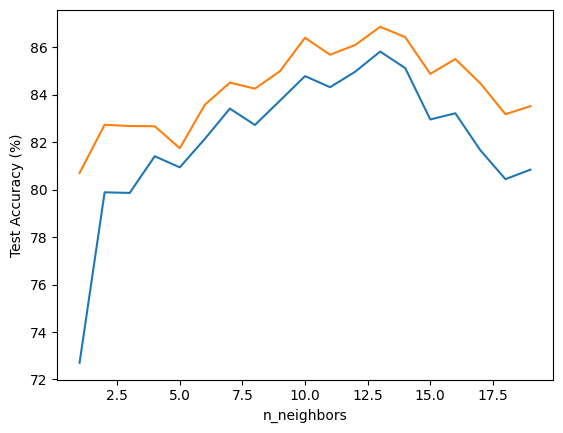

In [ ]:
plt.plot(range(1,20),pp)
plt.plot(range(1,20),fast)
plt.xlabel('n_neighbors')
plt.ylabel('Test Accuracy (%)')
plt.savefig('knn n_neighbors vs acc.jpg')
#plt.plot(x,mse_ada)

# graphs

In [ ]:
from sklearn import model_selection
import math
d=pd.DataFrame()
d["Model"]=model
d["PP Testacc"]=pp
d["Fasting Testacc"]=fasting
d["avg r2"]=r2_mean
d["avg mse"]=mse_mean
d["avg rmse"]=[math.sqrt(m) for m in mse_mean]
d["avg evs"]=evs_mean
d["avg msle"]=msle_mean

In [ ]:
d.to_csv("/content/drive/MyDrive/Non Invasive Glucometer/Model Analysis.csv",index=False)
d

,Model,PP Testacc,Fasting Testacc,avg r2,avg mse,avg rmse,avg evs,avg msle
0,Linear,85.023916,88.967658,0.363801,270.386577,16.443436,0.409441,0.024738
1,Ridge,82.319297,84.286477,-0.336491,560.599597,23.676985,-0.153284,0.031143
2,Lasso,83.088873,85.624950,-0.172770,494.184826,22.230268,-0.001619,0.027520
3,Elastic,83.182216,85.610045,-0.156684,486.886607,22.065507,0.013212,0.027257
4,SVR,86.719575,87.685992,0.165534,353.152004,18.792339,0.204106,0.021275
5,Decision Tree,92.781188,89.296301,0.587796,151.437500,12.305994,0.600788,0.010848
6,Random Forest,93.880448,91.980089,0.756789,90.074994,9.490785,0.759651,0.006707
7,Gradient Boosting,92.073093,91.485495,0.630465,148.545380,12.187919,0.640578,0.010269
8,Ada Boost,93.224852,92.674101,0.764432,90.746341,9.526087,0.767191,0.007177
9,Gaussian NB,81.451653,86.060239,-0.793297,757.062500,27.514769,-0.324500,0.053609


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

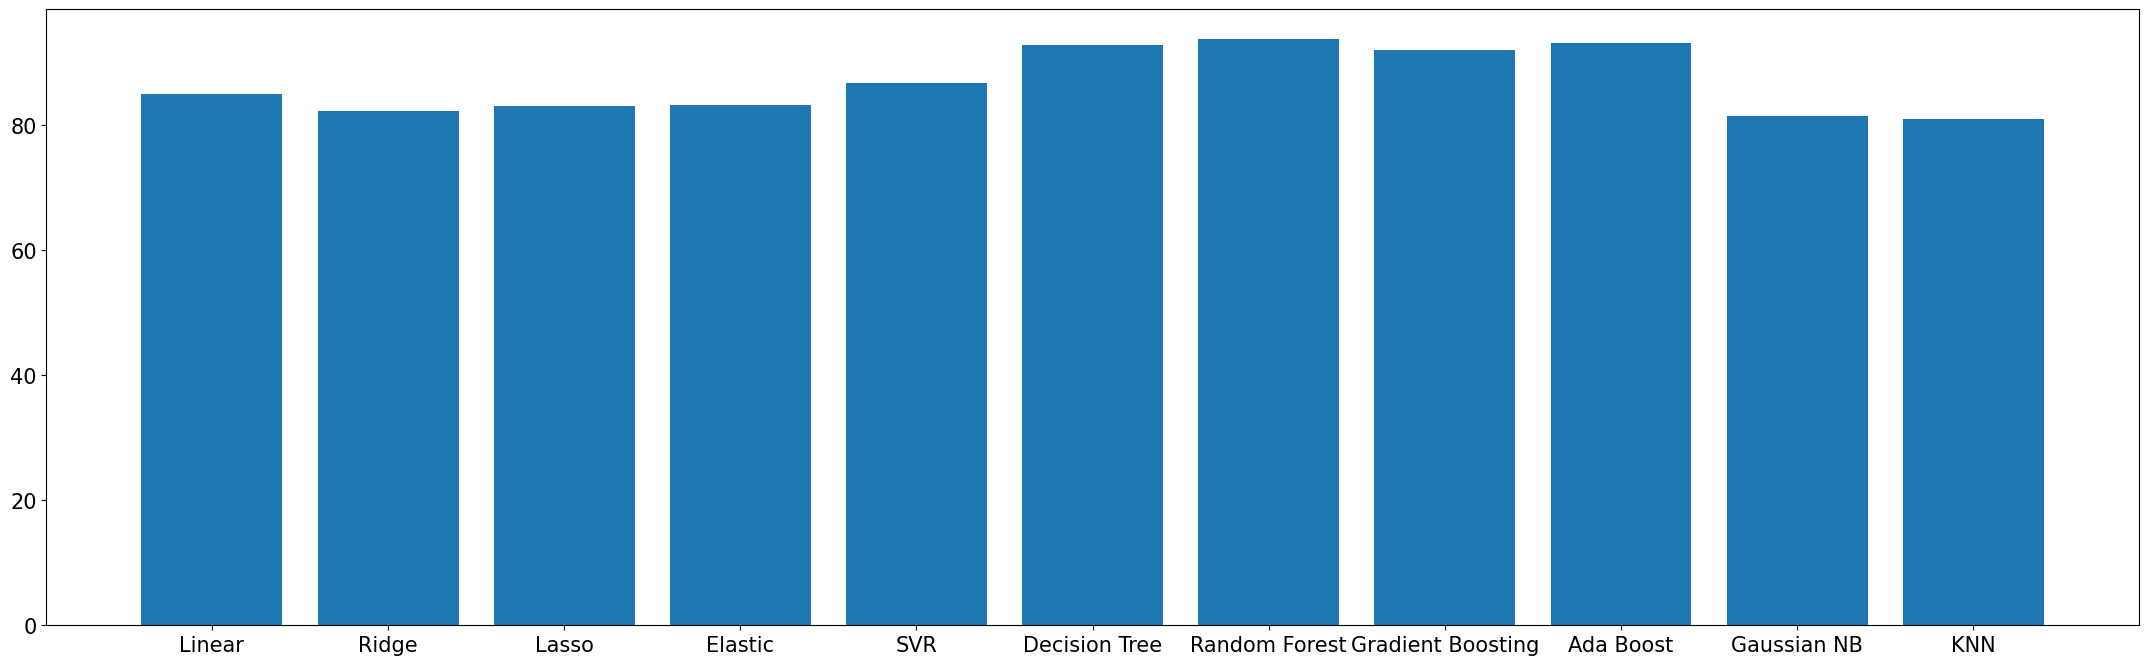

In [ ]:
plt.figure(figsize=(27, 8))
plt.bar(model,pp)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Regression Models')
plt.ylabel('Test Accuracy(%)')
plt.show()